In [188]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import warnings to handle warnings during runtime
import warnings
warnings.filterwarnings('ignore')


In [189]:
# Import dataset
df = pd.read_csv('/Users/dell/datasets/Car Data/car_data.csv')
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [190]:
df.shape

(8128, 13)

In [191]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


### In Data Analysis We will analyze
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(SalePrice)

In [193]:
# drop unimportant columns
df.drop(['name', 'torque', 'max_power'], axis=1, inplace=True)
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,5.0


In [194]:
#Check Null Values
df.isnull().sum()

year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
seats            221
dtype: int64

In [195]:
# Check the percentage of nan values present in each feature`

## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

## 2- step print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 3),  ' % missing values')

mileage 0.027  % missing values
engine 0.027  % missing values
seats 0.027  % missing values


In [196]:
# Replace missing value with a new label
def replace_cat_feature(df,features_with_na):
    data=df.copy()
    data[features_with_na]=data[features_with_na].fillna('nan')
    return data

df=replace_cat_feature(df,features_with_na)

df[features_with_na].isnull().sum()

mileage    0
engine     0
seats      0
dtype: int64

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           8128 non-null   int64 
 1   selling_price  8128 non-null   int64 
 2   km_driven      8128 non-null   int64 
 3   fuel           8128 non-null   object
 4   seller_type    8128 non-null   object
 5   transmission   8128 non-null   object
 6   owner          8128 non-null   object
 7   mileage        8128 non-null   object
 8   engine         8128 non-null   object
 9   seats          8128 non-null   object
dtypes: int64(3), object(7)
memory usage: 635.1+ KB


In [198]:
df['mileage'] = df['mileage'].str.split(' ').str[0].astype(float)
df['engine'] = df['engine'].str.split(' ').str[0].astype(float)
df['seats'] = df['seats'].astype(str)
df['seats'] = df['seats'].str.split('.').str[0].astype(float)

In [206]:
# Handling missing values
df['mileage'].fillna(df['mileage'].mean(), inplace=True)
df['engine'].fillna(df['engine'].mean(), inplace=True)
df['seats'].fillna(df['seats'].mean(), inplace=True)

In [208]:
df.isnull().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
seats            0
dtype: int64

In [253]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,5.0


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        8128 non-null   float64
 8   engine         8128 non-null   float64
 9   seats          8128 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 635.1+ KB


<AxesSubplot:>

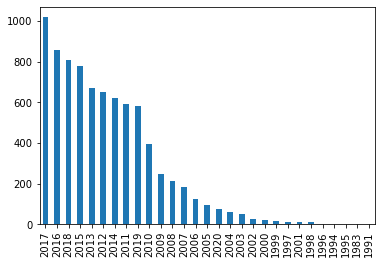

In [213]:
# Visualization
df['year'].value_counts().plot(kind='bar')

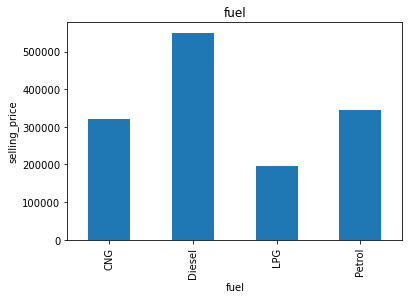

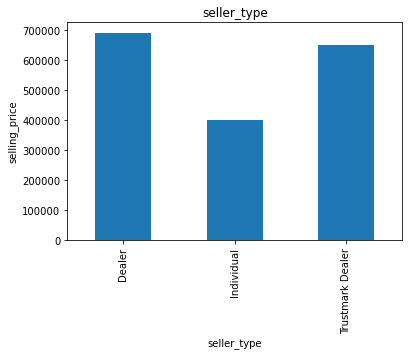

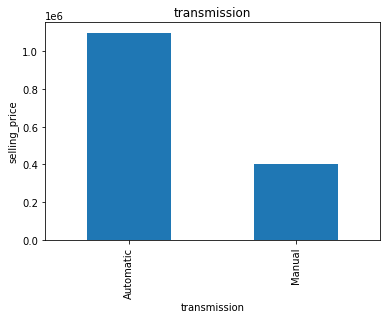

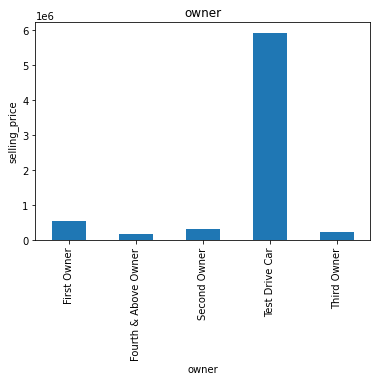

In [230]:
# Analyze the relationship between discrete variables and Sale Price
discrete_feature = ['fuel', 'seller_type', 'transmission', 'owner']
for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['selling_price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('selling_price')
    plt.title(feature)
    plt.show()

<AxesSubplot:>

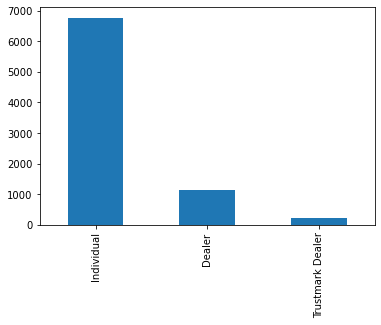

In [217]:
df['seller_type'].value_counts().plot(kind='bar')

<AxesSubplot:>

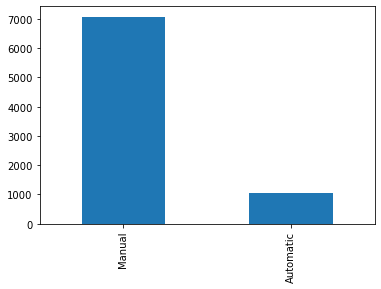

In [216]:
df['transmission'].value_counts().plot(kind='bar')

<AxesSubplot:>

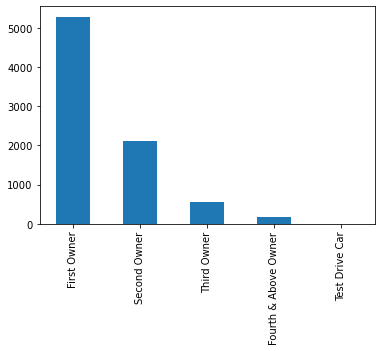

In [218]:
df['owner'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Car Price vs Year Sold')

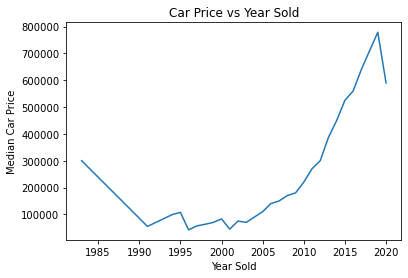

In [227]:
df.groupby('year')['selling_price'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median Car Price')
plt.title("Car Price vs Year Sold")

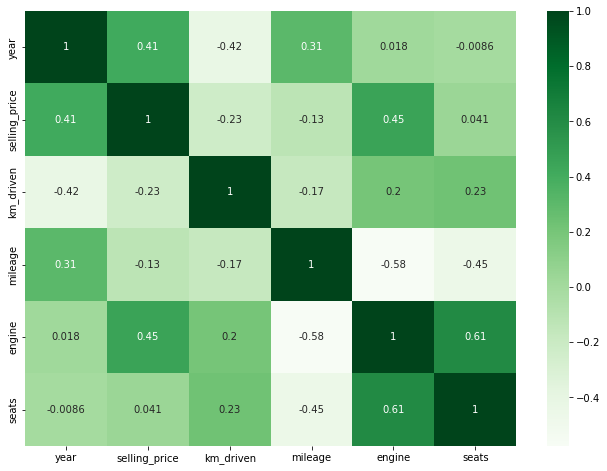

In [256]:
corr = df.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

In [258]:
# Apply onehot encoding
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df[['fuel', 'seller_type', 'transmission', 'owner']]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_df = df.join(encoder_df)

In [259]:
final_df.drop(['fuel', 'seller_type', 'transmission', 'owner'], axis=1, inplace=True)
final_df.head()

,year,selling_price,km_driven,mileage,engine,seats,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2014,450000,145500,23.40,1248.0,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,2014,370000,120000,21.14,1498.0,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,2006,158000,140000,17.70,1497.0,5.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2010,225000,127000,23.00,1396.0,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,2007,130000,120000,16.10,1298.0,5.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


## Model Building
1. Linear regression
2. Lasso regressor
3. Random Forest

### 1. Linear Regression

In [238]:
## capture independant feature from dataset
X = final_df.drop(['selling_price', 'year'],axis=1)
## Capture the dependent feature
y = final_df[['selling_price']]

In [242]:
## train test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [243]:
## standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [244]:
from sklearn.linear_model import LinearRegression
##cross validation
from sklearn.model_selection import cross_val_score
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [245]:
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
np.mean(mse)

-303172443220.0269

In [250]:
from sklearn.metrics import r2_score
score=r2_score(reg_pred,y_test)
print(score)

0.2700358533300967


In [262]:
##prediction 
y_pred=regression.predict(X_test)

In [263]:
y_pred

array([[ 147951.8658043 ],
       [ 365078.50464622],
       [ 548374.50464622],
       ...,
       [1608854.50464622],
       [ 294934.50464622],
       [  73334.50464622]])

<AxesSubplot:ylabel='Density'>

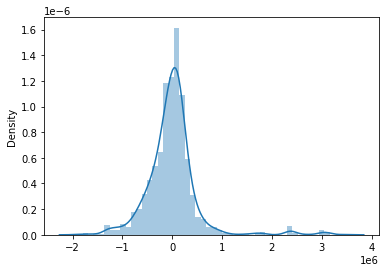

In [260]:
#sns.displot(y_pred-y_test,kind='kde')
sns.distplot(y_test-y_pred)

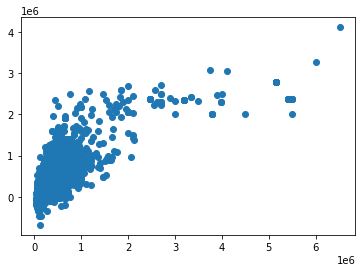

In [261]:
plt.scatter(y_test,y_pred)

### 2. Ridge and Lasso Regressor

In [264]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [265]:
ridge_regressor=Ridge()

In [266]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [267]:
print(ridgecv.best_params_)
{'alpha': 10}
print(ridgecv.best_score_)

{'alpha': 90}
-300147953011.18195


In [268]:
ridge_pred=ridgecv.predict(X_test)

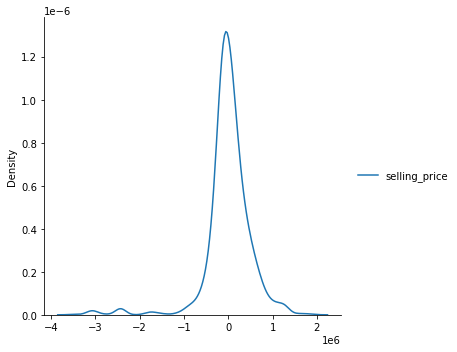

In [269]:
import seaborn as sns
sns.displot(ridge_pred-y_test,kind='kde')

In [270]:
score=r2_score(ridge_pred,y_test)
print(score)

0.25004702711221505


In [271]:
## Lasso Regression
from sklearn.linear_model import Lasso

In [272]:
lasso=Lasso()

In [273]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [274]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 90}
-300586256062.88007


In [277]:
lasso_pred=lassocv.predict(X_test)

In [278]:
sns.displot(lasso_pred-y_test,kind='kde')

ValueError: Unable to coerce to Series, length must be 1: given 1626